## Import data

In [17]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# (1): y0=-0.05*L, (2): y0=-0.0005*L, (3): y0=-0.0005*L swapped left, right, (4): y0=-0.05*L, I=10e9
runID = 4

pkl_fname = f'./Data/Ilic_Dynamics_run{runID}.pkl'
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

timeL = data['timeL']
timeM = data['timeM']

YL = data['YL']
x = YL[0]
y = YL[1]
vx = YL[2]
vy = YL[3]
phiM = data['phiM']
phidotM = data['phidot']

eps = data['eps']
epsdot = data['epsdot']

Text(0.5, 0.98, 'runID = 4')

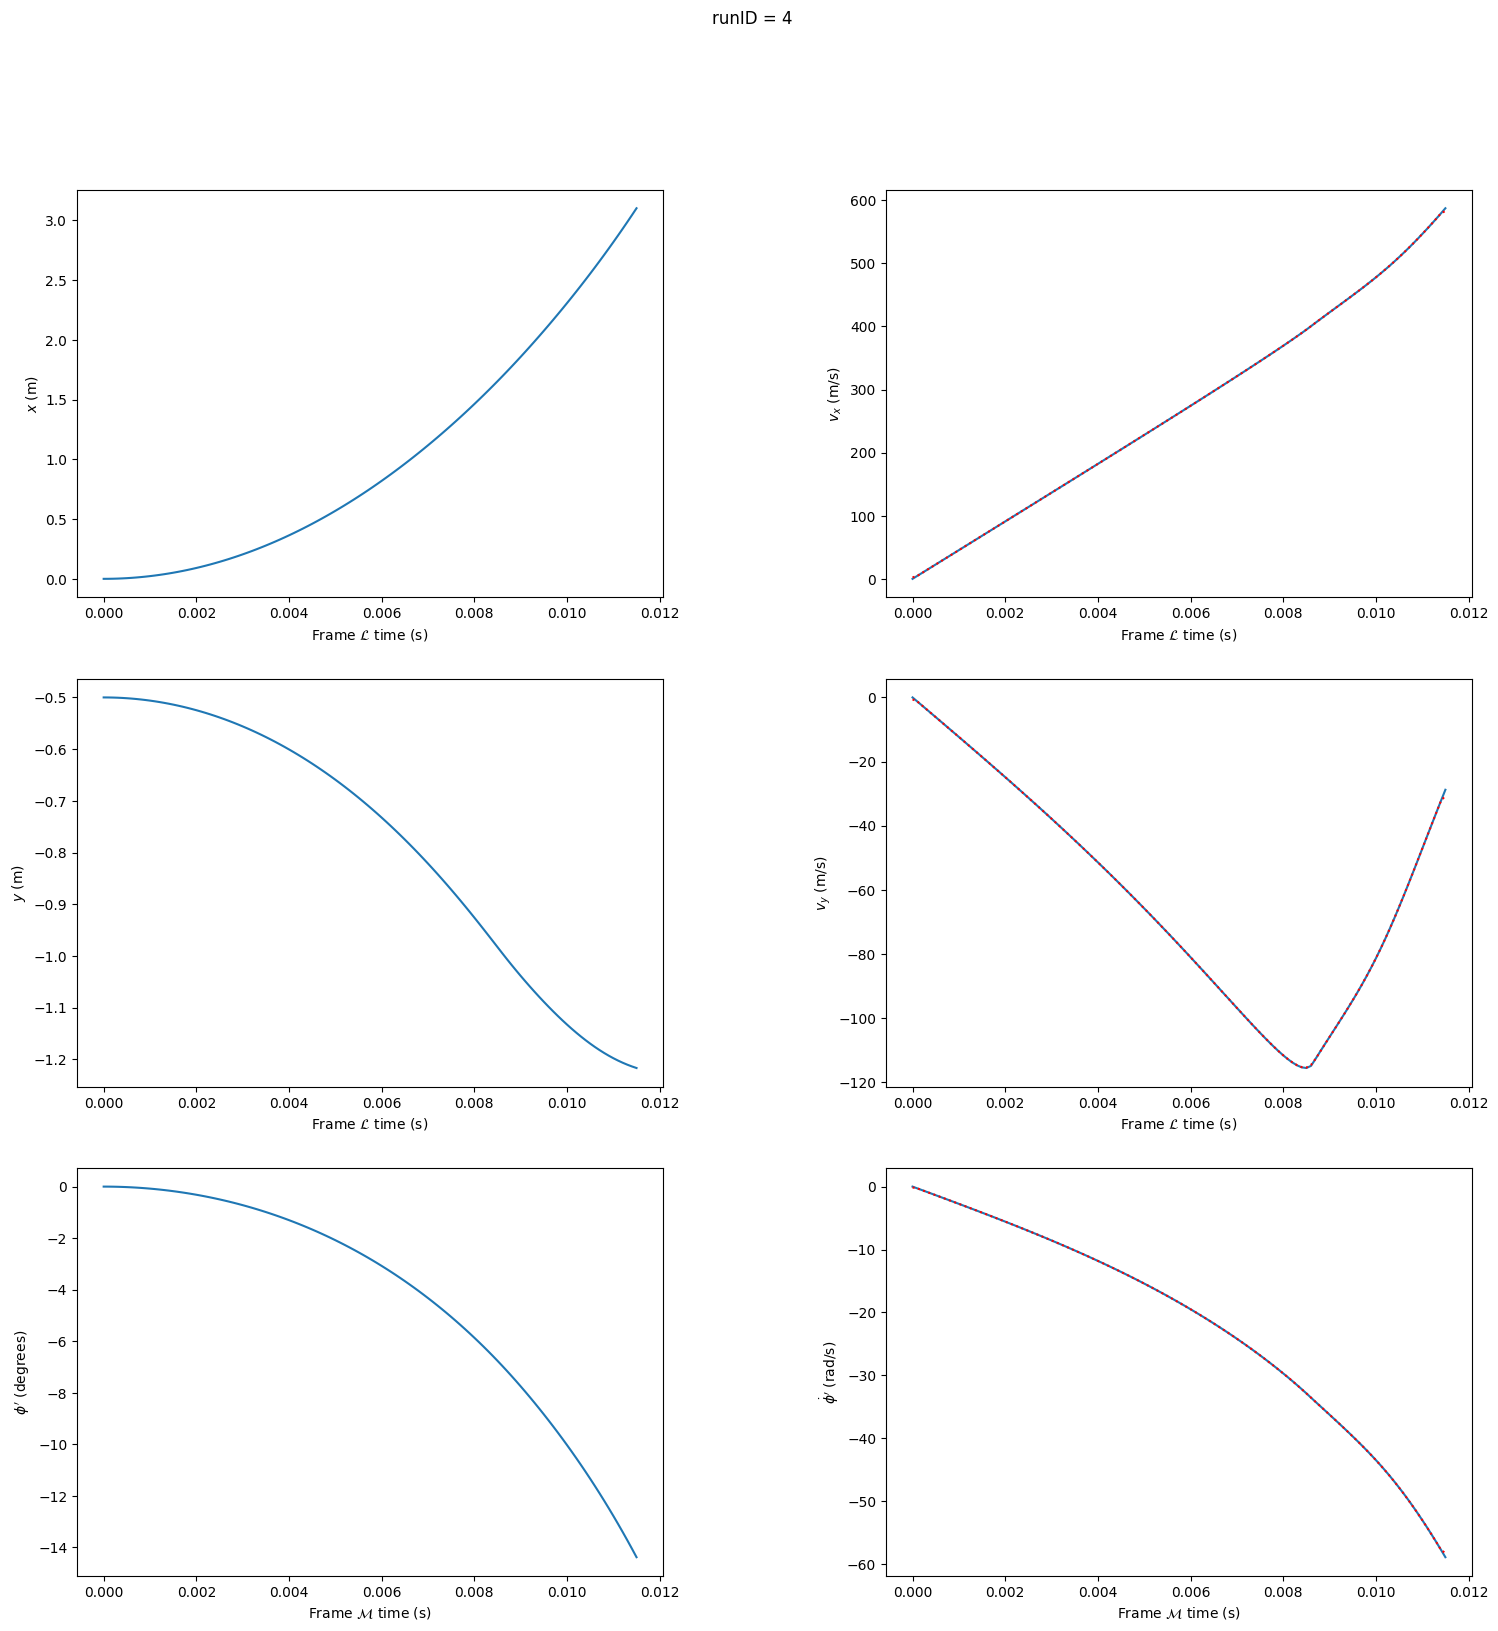

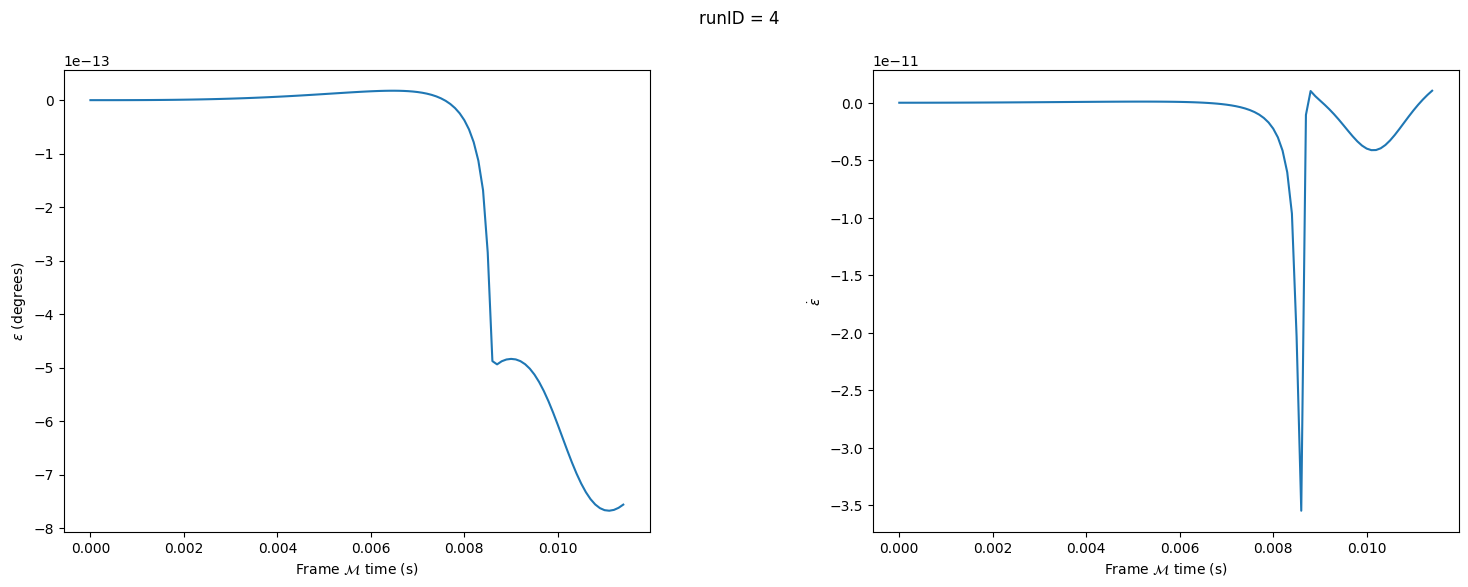

In [18]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.1,1), figsize=(18,18))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
ax1a.plot(timeL, x)
ax1b.plot(timeL, vx)
ax1b.plot(timeL, np.gradient(x,timeL), color="red", linestyle="dotted")
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x$ (m/s)")

############
ax2a.plot(timeL, y)
ax2b.plot(timeL, vy)
ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y$ (m)")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM, (180/np.pi)*phiM)
ax3b.plot(timeM, phidotM)
ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rad/s)")

fig.suptitle(rf"runID = {runID}")

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

ax4a.plot(timeM[0:-1], (180/np.pi)*eps)
ax4b.plot(timeM[0:-1], epsdot)
# ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

fig2.suptitle(rf"runID = {runID}")

Text(0.5, 0.98, 'runID = 2')

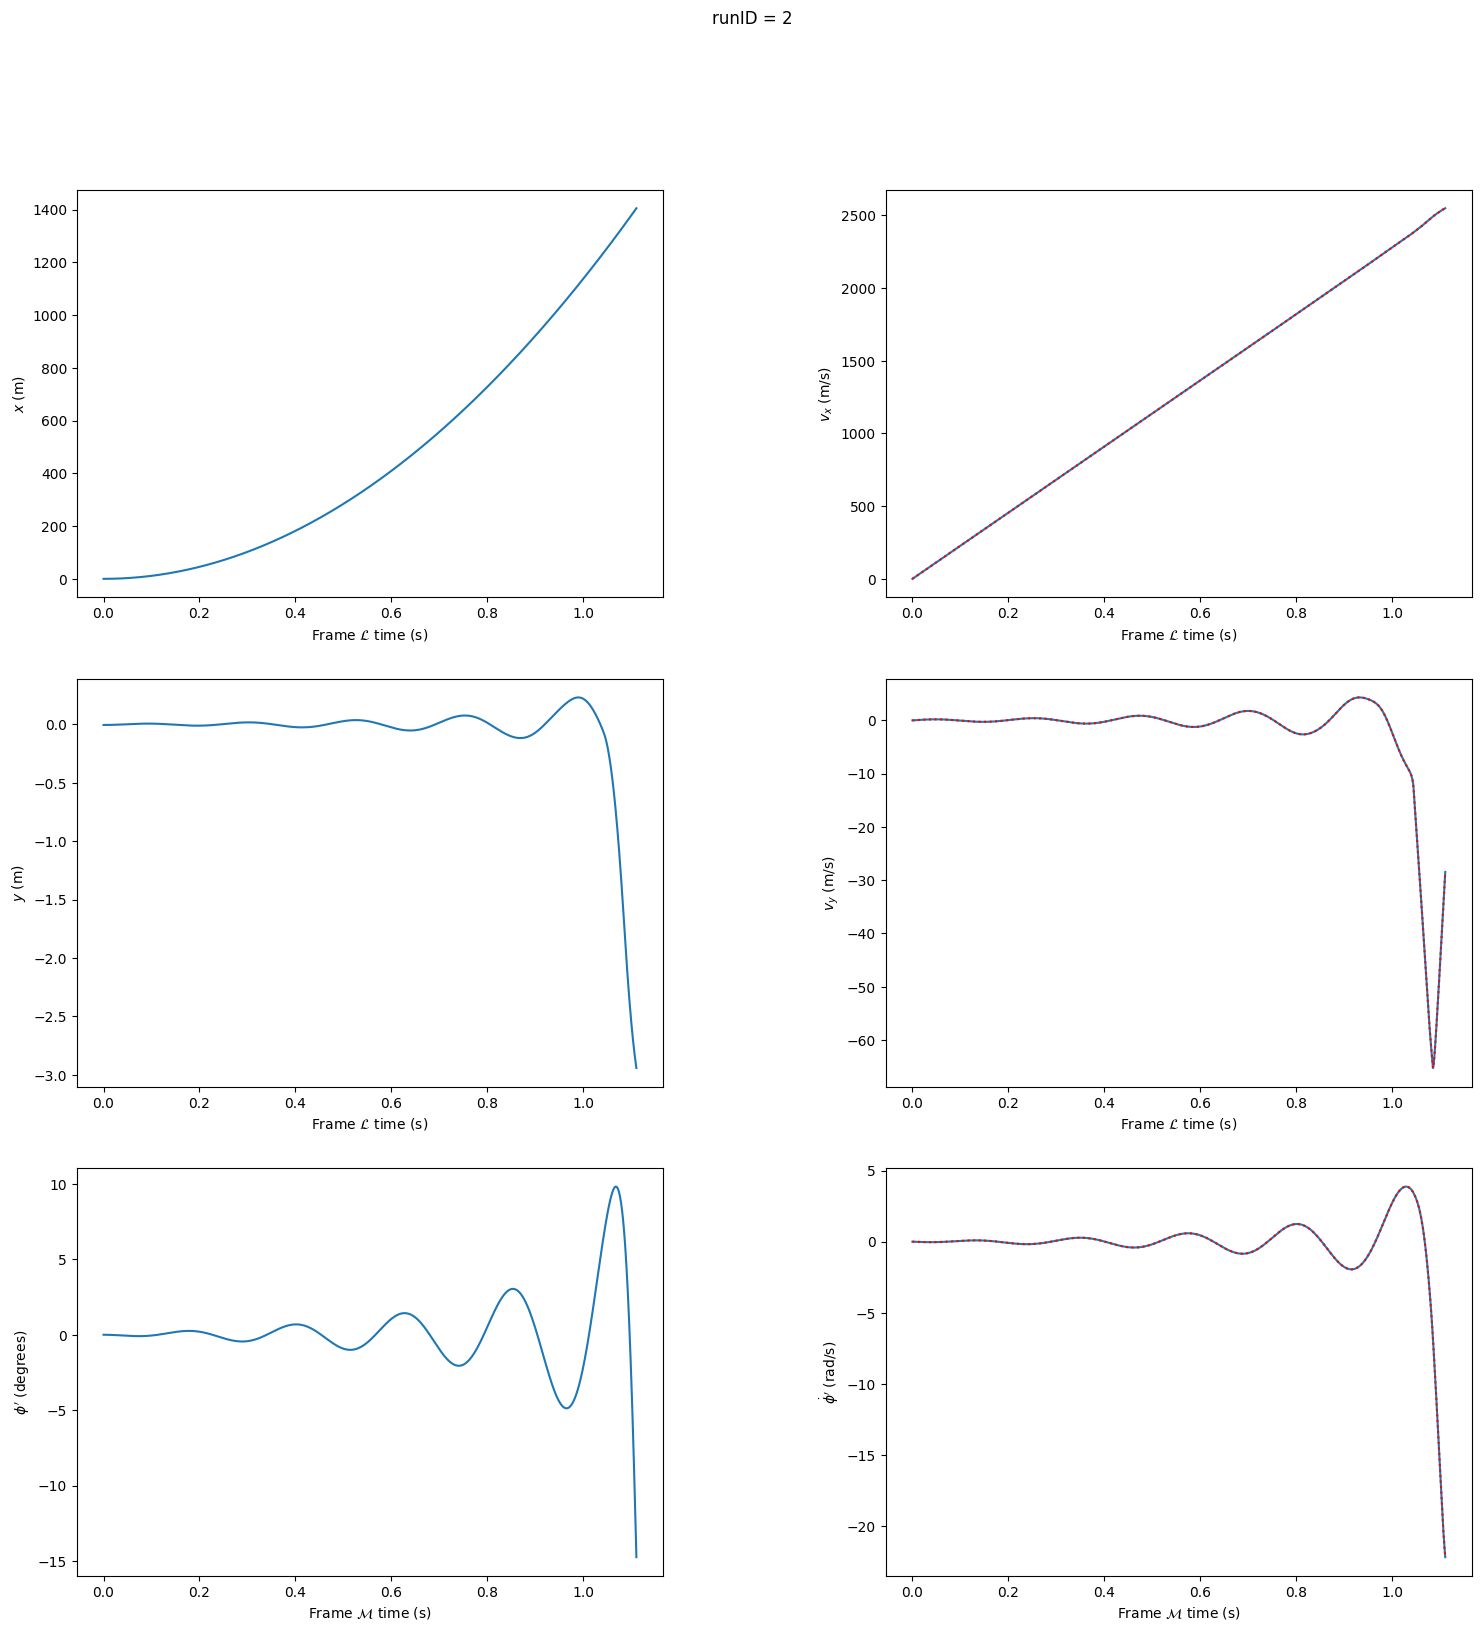

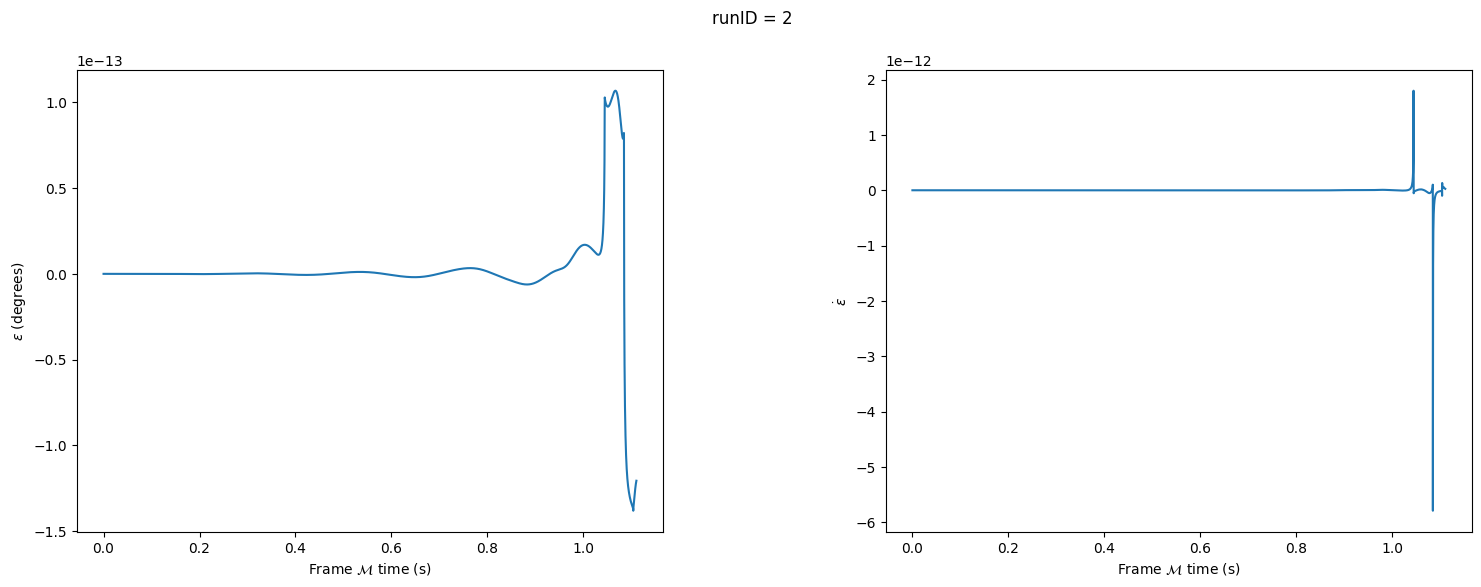

In [12]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.1,1), figsize=(18,18))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
ax1a.plot(timeL, x)
ax1b.plot(timeL, vx)
ax1b.plot(timeL, np.gradient(x,timeL), color="red", linestyle="dotted")
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x$ (m/s)")

############
ax2a.plot(timeL, y)
ax2b.plot(timeL, vy)
ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y$ (m)")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM, (180/np.pi)*phiM)
ax3b.plot(timeM, phidotM)
ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rad/s)")

fig.suptitle(rf"runID = {runID}")

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

ax4a.plot(timeM[0:-1], (180/np.pi)*eps)
ax4b.plot(timeM[0:-1], epsdot)
# ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

fig2.suptitle(rf"runID = {runID}")

## Old

[Text(0.5, 0, 'Frame $\\mathcal{M}$ time (s)'),
 Text(0, 0.5, '$\\dot{\\varepsilon}$')]

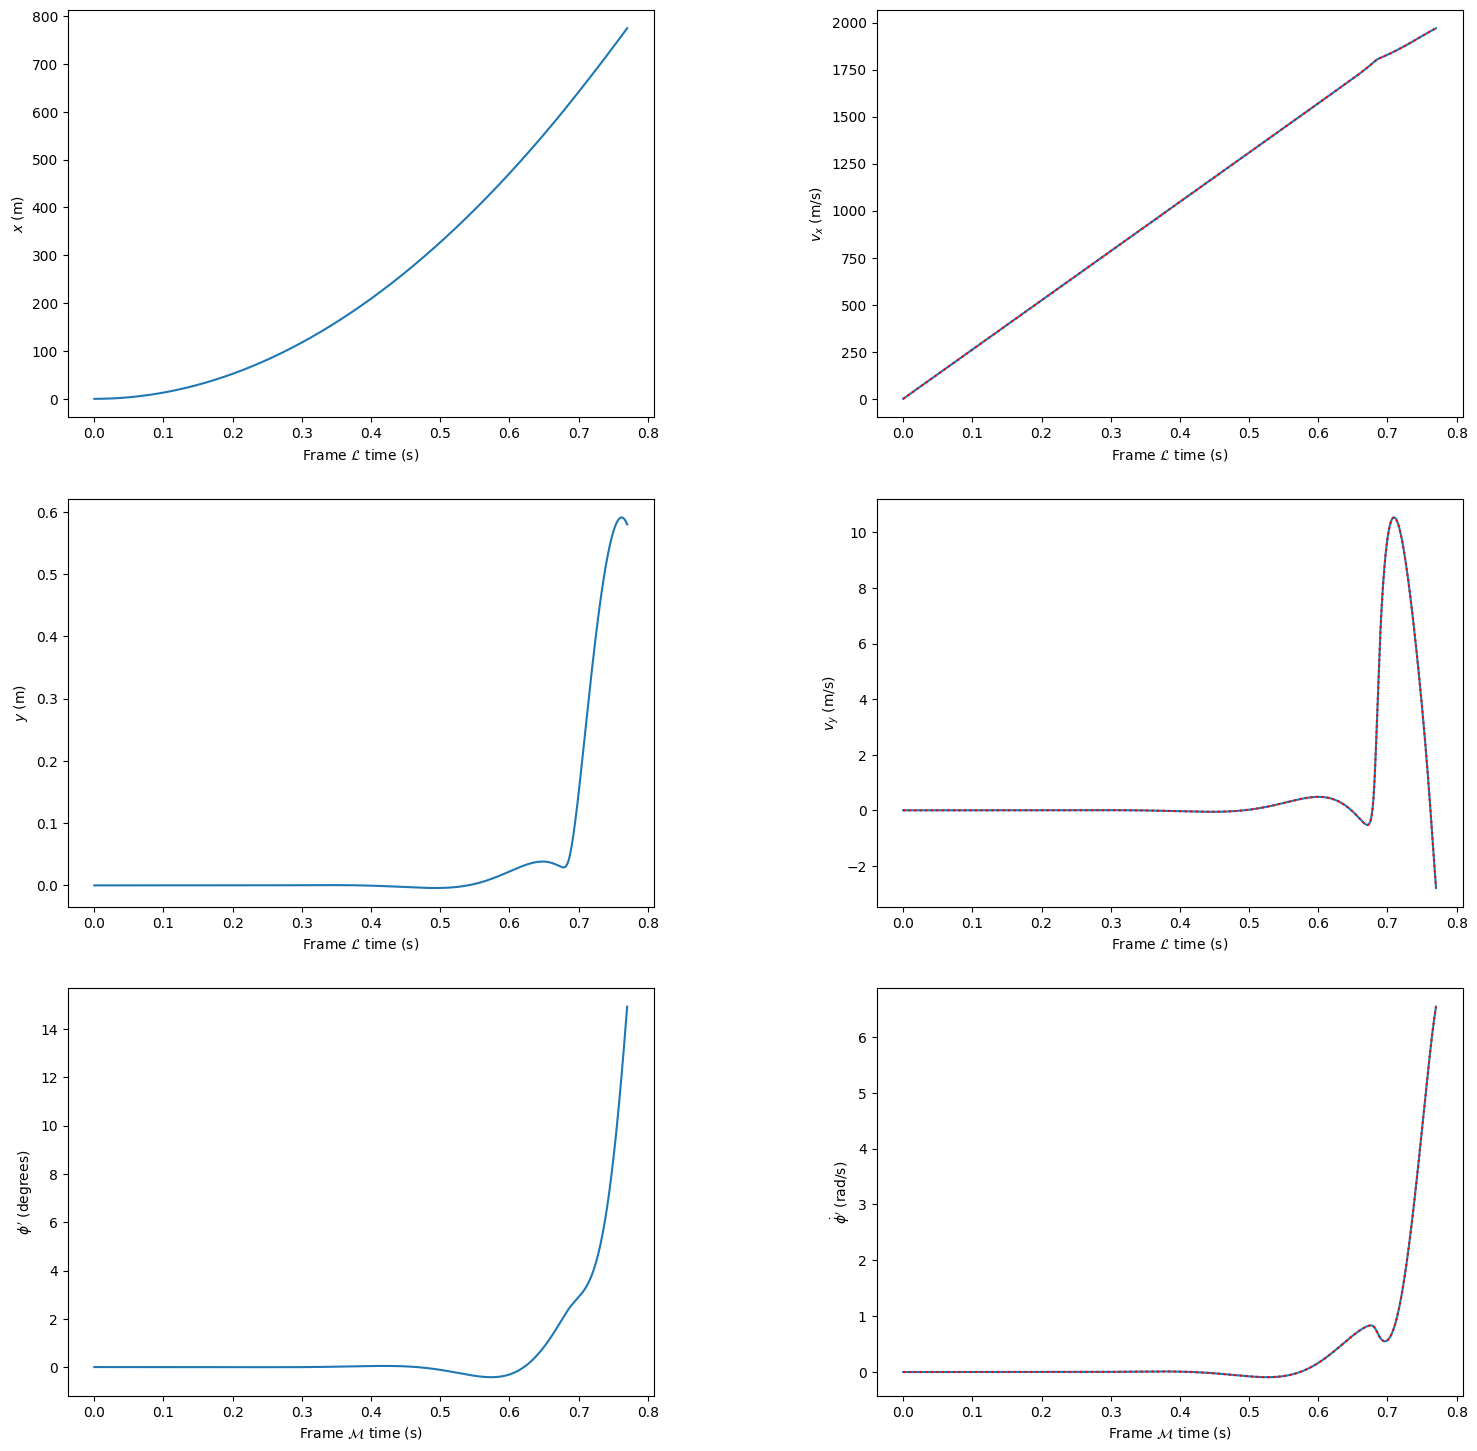

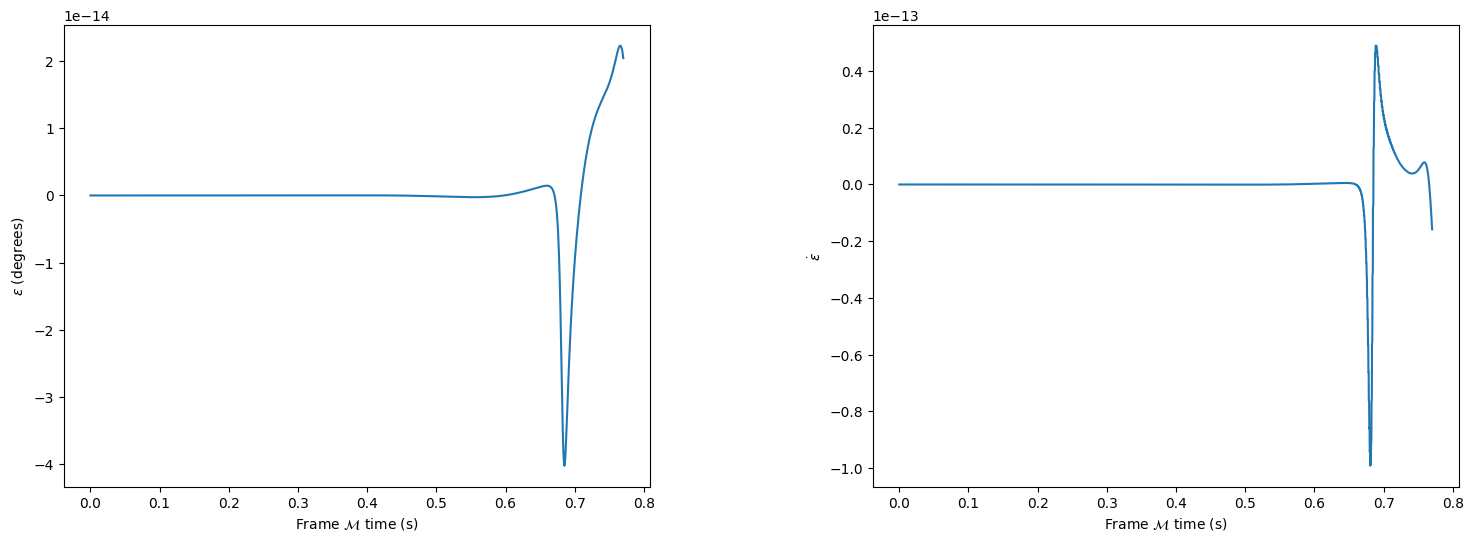

In [10]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.1,1), figsize=(18,18))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
ax1a.plot(timeL, x)
ax1b.plot(timeL, vx)
ax1b.plot(timeL, np.gradient(x,timeL), color="red", linestyle="dotted")
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x$ (m/s)")

############
ax2a.plot(timeL, y)
ax2b.plot(timeL, vy)
ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y$ (m)")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM, (180/np.pi)*phiM)
ax3b.plot(timeM, phidotM)
ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rad/s)")

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

ax4a.plot(timeM[0:-1], (180/np.pi)*eps)
ax4b.plot(timeM[0:-1], epsdot)
# ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

## Newer

[Text(0.5, 0, 'Frame $\\mathcal{M}$ time (s)'),
 Text(0, 0.5, '$\\dot{\\varepsilon}$')]

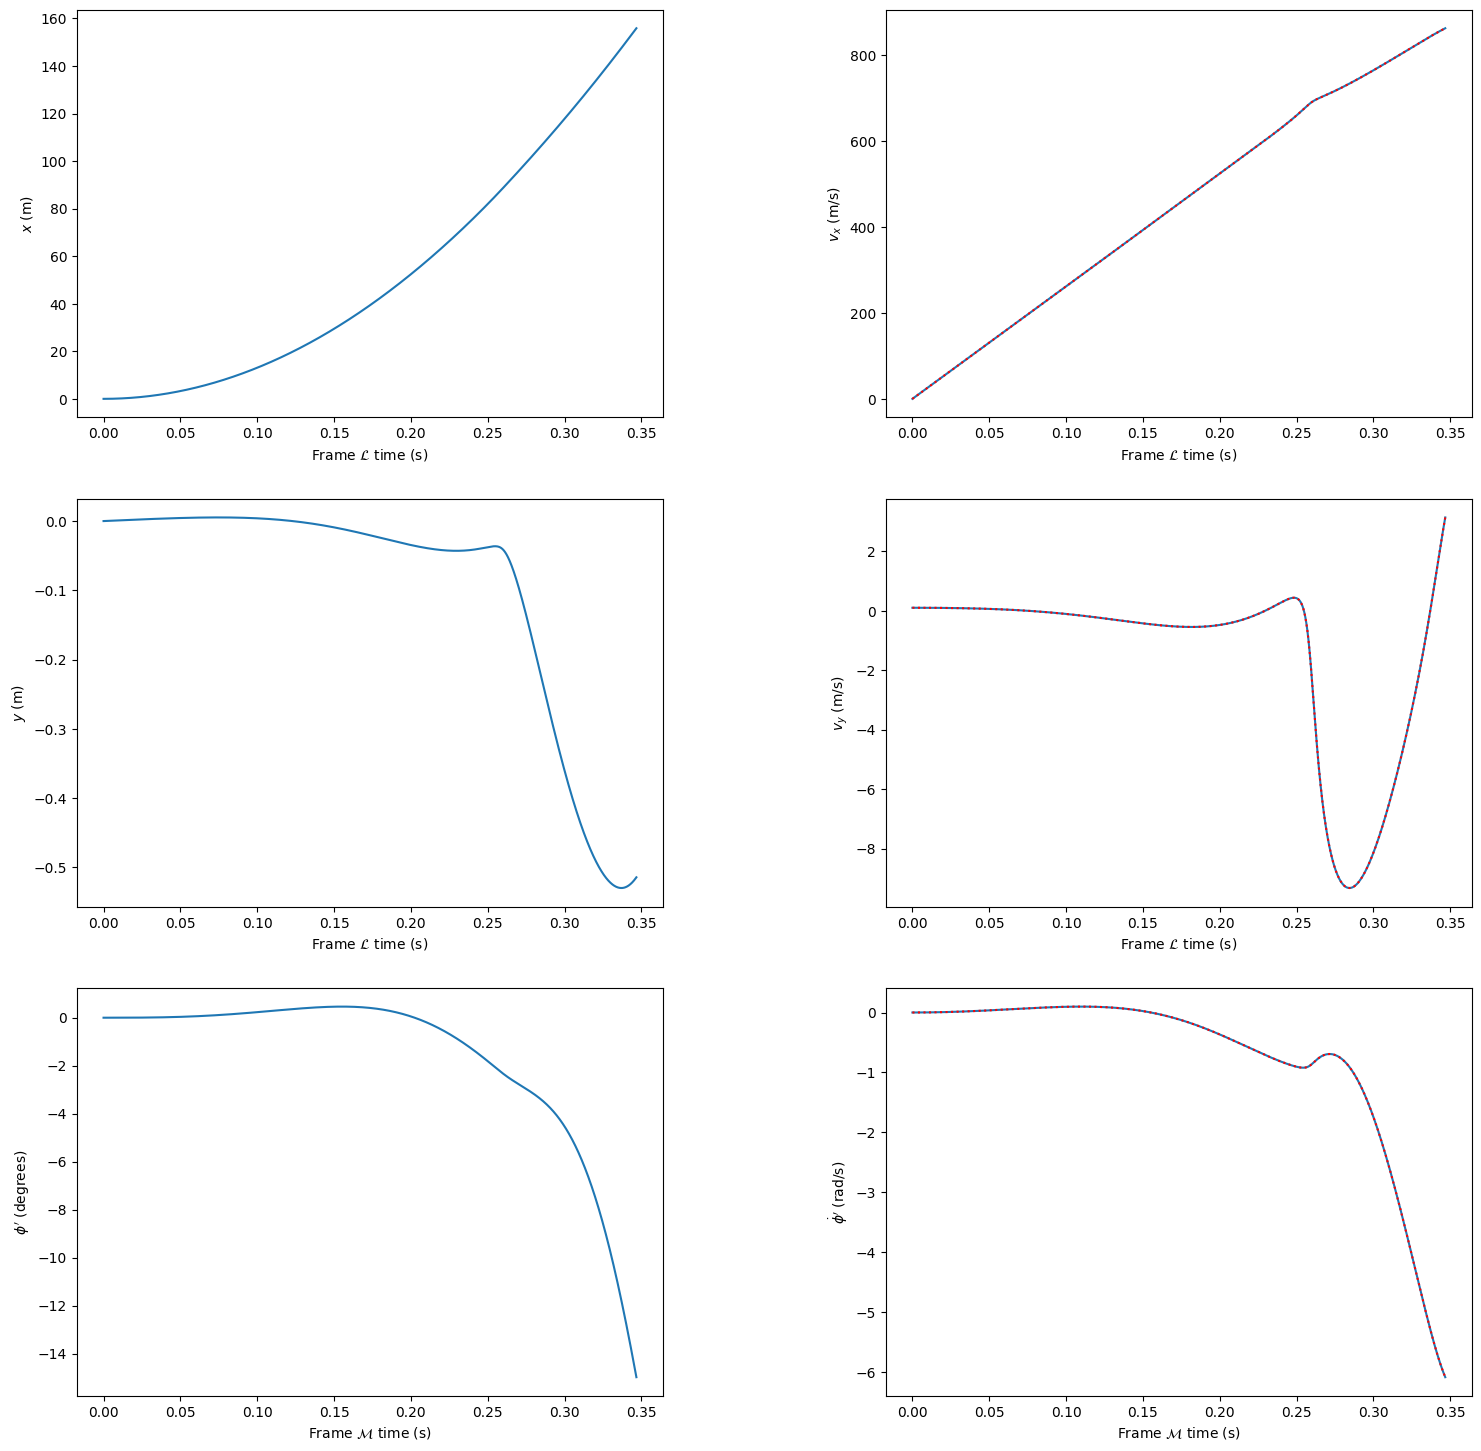

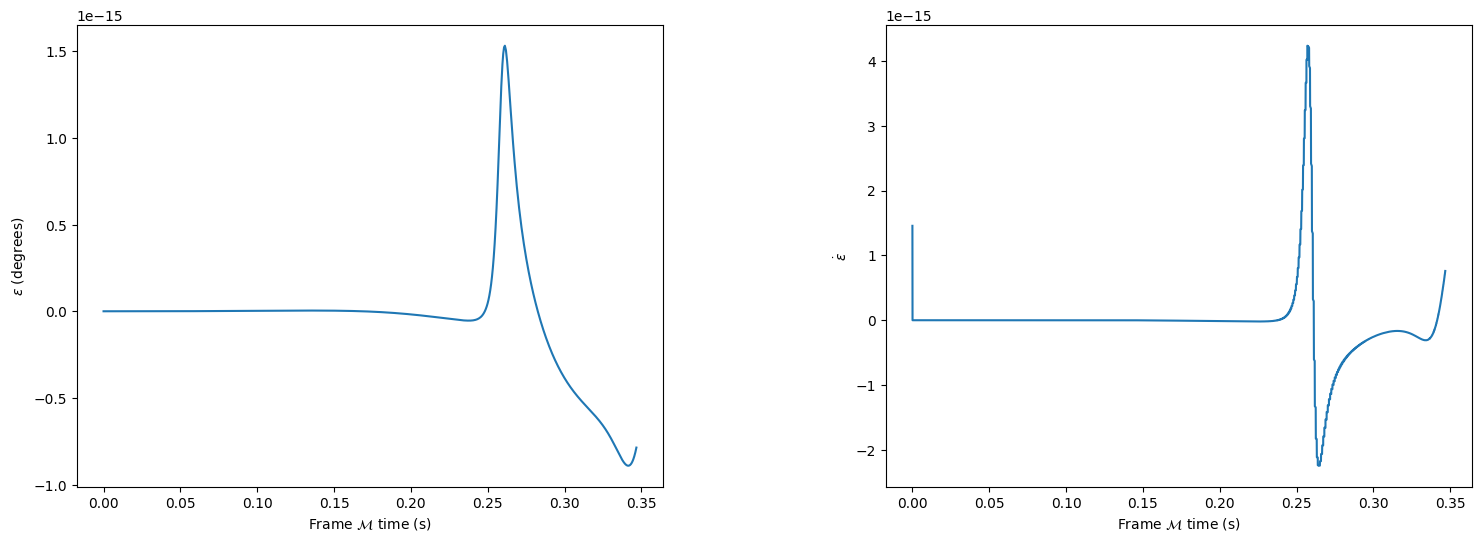

In [6]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.1,1), figsize=(18,18))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
ax1a.plot(timeL, x)
ax1b.plot(timeL, vx)
ax1b.plot(timeL, np.gradient(x,timeL), color="red", linestyle="dotted")
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x$ (m/s)")

############
ax2a.plot(timeL, y)
ax2b.plot(timeL, vy)
ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y$ (m)")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM, (180/np.pi)*phiM)
ax3b.plot(timeM, phidotM)
ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rad/s)")

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

ax4a.plot(timeM[0:-1], (180/np.pi)*eps)
ax4b.plot(timeM[0:-1], epsdot)
# ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")